<a href="https://colab.research.google.com/github/TonioBay/Spotify-top-items-colab/blob/main/Spotify_stats_Token.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
from requests import post , get
import json
import pandas as pd

# URLs necesarias


In [ ]:
API_BASE_URL = 'https://api.spotify.com/v1/'

# Top Tracks and Top Artist

## Instrucciones para obtener el token

* Para obtener acceso a la información es necesario ir al siguiente link e iniciar sesión si es necesario:
https://developer.spotify.com

* Una vez haber iniciado sesión hay que copiar el token que aparece dentro del codigo de la ventana y pegarlo en la parte de este colab donde menciona 'Ingresa el token' , **Nota: hay que pegarlo todo, es más largo de lo que se logra ver**.
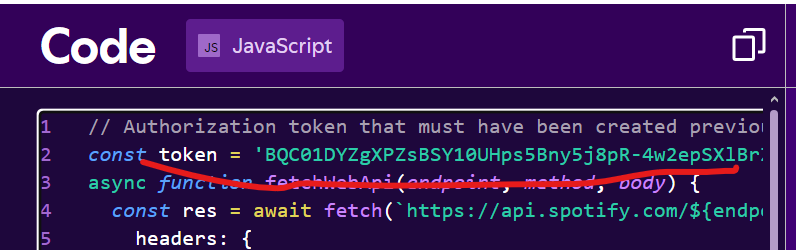


In [ ]:
#@title Token
#@markdown ___
#@markdown Ingresa el token
token = "" #@param{type:"string"}


In [ ]:
#@title Parametros
#@markdown ___
#@markdown Elegir el timpo de item que al cual se busca acceder, artista o canciones.
tipo_de_item = 'Canciones' #@param ['Canciones' , 'Artistas']
#@markdown Elegir el rango de tiempo de los datos a acceder.
rango_tiempo = 'ultimo año' #@param ['ultimo mes', 'ultimos 6 meses','ultimo año']
#@markdown Elegir la cantidad de items entre un rango de 1 a 50.
rango = 10 #@param {type:"slider", min:1, max:50, step:1}

dic_item = {
    'Artistas': 'artists',
    'Canciones': 'tracks'
}
dic_time = {'ultimo mes': 'short_term',
            'ultimos 6 meses': 'medium_term',
            'ultimo año': 'long_term'

}
# Parámetros usados en el header del método get
item_type = dic_item[tipo_de_item]
time_range = dic_time[rango_tiempo]
limit = str(rango)




## Generación del URL y get request

In [ ]:
## URl para el método get de la información de usuario
USER_TOP_ITEMS_URL = API_BASE_URL + f'me/top/{item_type}?time_range={time_range}&limit={limit}'
## Header método get
auth_header = {"Authorization":"Bearer " + token}


In [ ]:
user_top_item_response = get(USER_TOP_ITEMS_URL, headers=auth_header) #get method
user_top_item_response
user_top_item_response_json = user_top_item_response.json() # Respuesta en formato JSON


## Funciones para obtener la información de la respuesta

### Función `top_artists`
Busca en el archivo JSON de la respuesta y devuelve una lista con los nombres de los artistas más escuchados.

In [ ]:
def top_artists(response):
  """
  Devuelve una lista con los nombres de los artistas más escuchados
  """
  top_artists = []
  for items in response['items']:
    top_artists.append(items['name'])
  return top_artists


### Función `top_track`
Busca en el archivo  JSON de la respuesta y devuelve una lista con las canciones más escuchadas y sus artistas correspondientes.

In [ ]:
def top_tracks(response):
  """
  Devuelde una lista con las canciones más escuchadas y sus artistas
  """
  artists_name = []
  track_name = []

  for items in response['items']:
    track_name.append(items['name'])
    str_name = ''
    for items_artists in items['artists']:
      str_name += items_artists['name'] + ', '
      artists_n= str_name[:-2]
    artists_name.append(artists_n)
  return artists_name, track_name

### Función `top_items`
Devuelve un dataframe con los top items, ya sea artistas o canciones.

In [ ]:
def top_item(response):
  """
  Devuelve un dataframe con los nombres de los artistas o canciones mas escuchados
  """
  if tipo_de_item == 'Artistas':
    df = pd.DataFrame({'Artistas más escuchados':top_artists(response)})

  else:
    top_artists_name, track_name = top_tracks(response)
    df = pd.DataFrame({'Canciones más escuchadas':track_name, 'Artistas':top_artists_name})
  df.index = df.index + 1
  return df

## Dataframe con Top Items

In [ ]:
top_item(user_top_item_response_json)